In [ ]:
%config Completer.use_jedi = False

## Supplied stuff

Either work on the 18S RNA sequences, **OR** the COVID19 sequences from this link:

http://imolarpg.dyndns.org/stuff/ait/Covid19_2020_10_01.fasta.gz

Which look like this:

**>NA|England_1|2012_09_11|Human|United_Kingdom|NA|NC_038294|NA**
ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTTA
AATAAAAGCCCTGTTGTTTAGCGTATTGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCTC 
...




In [ ]:
#DOWNLOAD gzipped fasta, load it into a dictionary
!wget http://imolarpg.dyndns.org/stuff/ait/SILVA_128_SSURef_Nr99_tax_silva_trunc.fasta.gz
#!wget http://imolarpg.dyndns.org/stuff/ait/Covid19_2020_10_01.fasta.gz
import gzip

zipped_sequence_filename = "SILVA_128_SSURef_Nr99_tax_silva_trunc.fasta.gz"

#zipped_sequence_filename = "Covid19_2020_10_01.fasta.gz"

--2022-11-22 15:20:54--  http://imolarpg.dyndns.org/stuff/ait/SILVA_128_SSURef_Nr99_tax_silva_trunc.fasta.gz
Resolving imolarpg.dyndns.org (imolarpg.dyndns.org)... 176.241.39.178
Connecting to imolarpg.dyndns.org (imolarpg.dyndns.org)|176.241.39.178|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156331616 (149M) [application/x-gzip]
Saving to: ‘SILVA_128_SSURef_Nr99_tax_silva_trunc.fasta.gz’

SILVA_128_SSURef_Nr 100%[===================>] 149.09M  7.63MB/s    in 22s     

2022-11-22 15:21:16 (6.85 MB/s) - ‘SILVA_128_SSURef_Nr99_tax_silva_trunc.fasta.gz’ saved [156331616/156331616]



In [ ]:
keywords = ['Vertebrata']
allsequences = {}

def check_all_keywords_in_sequence_names(name):
    #Returns true if all keywords are present in the name of the sequence
    found = 0
    for keyword in keywords:
        if keyword.lower() in name.lower():
            found += 1
    if found == len(keywords):
        return True
    return False

def shorten_name(fullname):
    return fullname.partition(' ')[0]+' '+fullname.rpartition(';')[2]

def get_fasta_sequences_from_zip(filename):
    # Fasta format:
    #>GBHC01003613.162.1988 Eukaryota;Opisthokonta;Holozoa;Metazoa (Animalia);Eumetazoa;Bilateria;
    #Chordata;Vertebrata;Gnathostomata;Euteleostomi;Actinopterygii;Neopterygii;Teleostei;Salmo salar (Atlantic salmon)
    #CUUAAAUGAAGUUGCUGAGAAAAAGAAGCUUGUCUCAAAGAUUAAGCCAUGCAAGUCUAAGUACACACGGCCGGUACAGU
    #GAAACUGCGAAUGGCUCAUUAAAUCAGUUAUGGUUCCUUUGAUCGCUCCAACGUUACUUGGAUAACUGUGGCAAUUCUAG
    #AGCUAAUACAUGCAGACGAGCGCUGACCUCCGGGGAUGCGUGCAUUUAUCAGACCCAAAACCCAUGCGGGCCAAUCUCGG
    #...
    seq = []
    name = ''
    with gzip.open(filename,mode = 'rt') as f:
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if check_all_keywords_in_sequence_names(name):
                    seq = ''.join(seq)
                    print ("Length: %d Shortname: %s"%(len(seq), shorten_name(name)))
                    allsequences[name] = seq 
                seq = []
                name = line
            else:
                seq.append(line)

get_fasta_sequences_from_zip(zipped_sequence_filename)
print (len(allsequences)," names match keywords")


Length: 1806 Shortname: >GBHC01003612.162.1967 Salmo salar (Atlantic salmon)
Length: 1827 Shortname: >GBHC01003613.162.1988 Salmo salar (Atlantic salmon)
Length: 1800 Shortname: >GBHC01003614.162.1961 Salmo salar (Atlantic salmon)
Length: 1503 Shortname: >GBHC01003615.162.1664 Salmo salar (Atlantic salmon)
Length: 1808 Shortname: >GAAA01003669.5114.6921 Latimeria chalumnae (coelacanth)
Length: 1817 Shortname: >GEMA01036227.45.1861 Channa punctata (spotted snakehead)
Length: 1827 Shortname: >GDGS01003361.5033.6859 Austrofundulus limnaeus
Length: 1827 Shortname: >GEGF01008487.22.1848 Rhacophorus omeimontis (Omei tree frog)
Length: 1805 Shortname: >GBHE01000282.4.1808 Salmo salar (Atlantic salmon)
Length: 1799 Shortname: >GBHE01000284.4.1802 Salmo salar (Atlantic salmon)
Length: 1502 Shortname: >GBHE01000288.4.1505 Salmo salar (Atlantic salmon)
Length: 1847 Shortname: >GECV01033741.5451.7297 Microhyla fissipes
Length: 1835 Shortname: >GBGE01194461.538.2372 Oryzias melastigma (Indian medak

The next step is to filter down the individual sequences

1.   One sequence per species (optionally chose the one that is most similar to all other species)
2.   Choose based on size (e.g. create a histogram of lengths)
3.   Select a manageable subset of species (based on any criteria)




In [ ]:
MAX_SEQUENCES = 50 # the number of sequences to run on!

unique_species = []
unique_sequences = []
minimum_sequence_length = 1500 #minimum length of 1500, because we are doing global and not local alignment...

for name in allsequences.keys():
    if ';' in name:
        speciesname = name.rpartition(';')[2]
        if len(allsequences[name]) > minimum_sequence_length and speciesname not in unique_species: #minimum length of 1500, because we are doing global and not local alignment...
            unique_species.append(speciesname)
            unique_sequences.append(name)
unique_sequences = sorted(unique_sequences)

unique_sequences = unique_sequences[0:MAX_SEQUENCES] #truncate the list to something more manageable

print ('Number of unique species: %d'%len(unique_species))
print ('Number of sequences: %d'%len(unique_sequences))

shortnames = [n.rpartition(';')[2] for n in unique_sequences]


Number of unique species: 304
Number of sequences: 50


Create a distance matrix of the sequences
There are some gross simplifications here, with many areas for improvement

1.   Use local alignment instead of global alignment. 
        This requires the usage of the parasail library rather than nwalign. Parasail is much faster as well!
2.   Very simple scoring function
3. Note that NW maximizes the alignment (similarity) score of two sequences, but we want to minimize the edit distance


In [ ]:
!pip install nwalign3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 202 kB 17.9 MB/s 


In [ ]:
import time
import numpy as np
import nwalign3 as nw 


def score_distance(a,b,match = 0, mismatch = 1, gap_open = 2, gap_extend = 1): #change these scoring parameters!
    myscore = 0
    previous_was_gap = False


    if len(a) != len(b):
        print ("Sequences to score must have identical lengths! %d != %d"%(len(a),len(b)))
    start = 0
    end = len(a)
    while (a[start] == '-' or b[start] == '-'):
        start+=1
    
    while(a[end-1] == '-' or b[end-1] == '-'):
        end -=1
    #print (len(a), start,end)
    
    for i in range(start,end):
        if a[i] == '-' or b[i] == '-':    
            if previous_was_gap :
                myscore += gap_extend
            else:
                myscore += gap_open
            previous_was_gap = True
        else:
            previous_was_gap = False
            if a[i] == b[i]:
                myscore += match
            else:
                myscore += mismatch
    return myscore

t0 = time.time()


unique_sequences = unique_sequences[0:MAX_SEQUENCES] # only do the first 50 for speed..

distance_matrix = np.zeros((len(unique_sequences),len(unique_sequences)))

for x,seq1 in enumerate(unique_sequences):
    for y, seq2 in enumerate(unique_sequences):
        if x == y:
            distance_matrix[x,y] = 0
        if y > x:
            alignment = nw.global_align(allsequences[seq1], allsequences[seq2])
            score = score_distance(alignment[0], alignment[1])
            distance_matrix[x,y]= score

            #print (shorten_name(seq1),len(allsequences[seq1]), 'vs', shorten_name(seq2),len(allsequences[seq2]),'discance =',score)
            #print (alignment[0])
            #print (alignment[1])
        else: 
            distance_matrix[x,y] = distance_matrix[y,x]
    print ('%d/%d Calculated %d alignments in %f seconds'%(x,len(unique_sequences),len(unique_sequences)-x,time.time()-t0))
    t0 = time.time()

print (distance_matrix)
for x,seq1 in enumerate(unique_sequences):
    print('\t'.join([str(y) for y in distance_matrix[x,:]]))
    #for y, seq2 in enumerate(unique_sequences):

0/50 Calculated 50 alignments in 2.434490 seconds
1/50 Calculated 49 alignments in 2.226213 seconds
2/50 Calculated 48 alignments in 2.250414 seconds
3/50 Calculated 47 alignments in 2.056439 seconds
4/50 Calculated 46 alignments in 2.059304 seconds
5/50 Calculated 45 alignments in 1.968947 seconds
6/50 Calculated 44 alignments in 2.058445 seconds
7/50 Calculated 43 alignments in 1.625773 seconds
8/50 Calculated 42 alignments in 1.671075 seconds
9/50 Calculated 41 alignments in 1.546689 seconds
10/50 Calculated 40 alignments in 1.678009 seconds
11/50 Calculated 39 alignments in 1.358587 seconds
12/50 Calculated 38 alignments in 1.843389 seconds
13/50 Calculated 37 alignments in 2.088544 seconds
14/50 Calculated 36 alignments in 1.566129 seconds
15/50 Calculated 35 alignments in 1.238993 seconds
16/50 Calculated 34 alignments in 1.299115 seconds
17/50 Calculated 33 alignments in 1.189278 seconds
18/50 Calculated 32 alignments in 1.387023 seconds
19/50 Calculated 31 alignments in 1.18177

Cluster the distance matrix and create a dendrogram from it


(50, 50)
[44, 26, 11, 13, 22, 6, 25, 16, 31, 23, 0, 28, 2, 7, 9, 8, 41, 19, 20, 43, 18, 42, 40, 38, 39, 15, 32, 45, 1, 29, 37, 35, 36, 17, 4, 3, 24, 14, 10, 5, 27, 21, 33, 12, 30, 34, 49, 46, 47, 48]


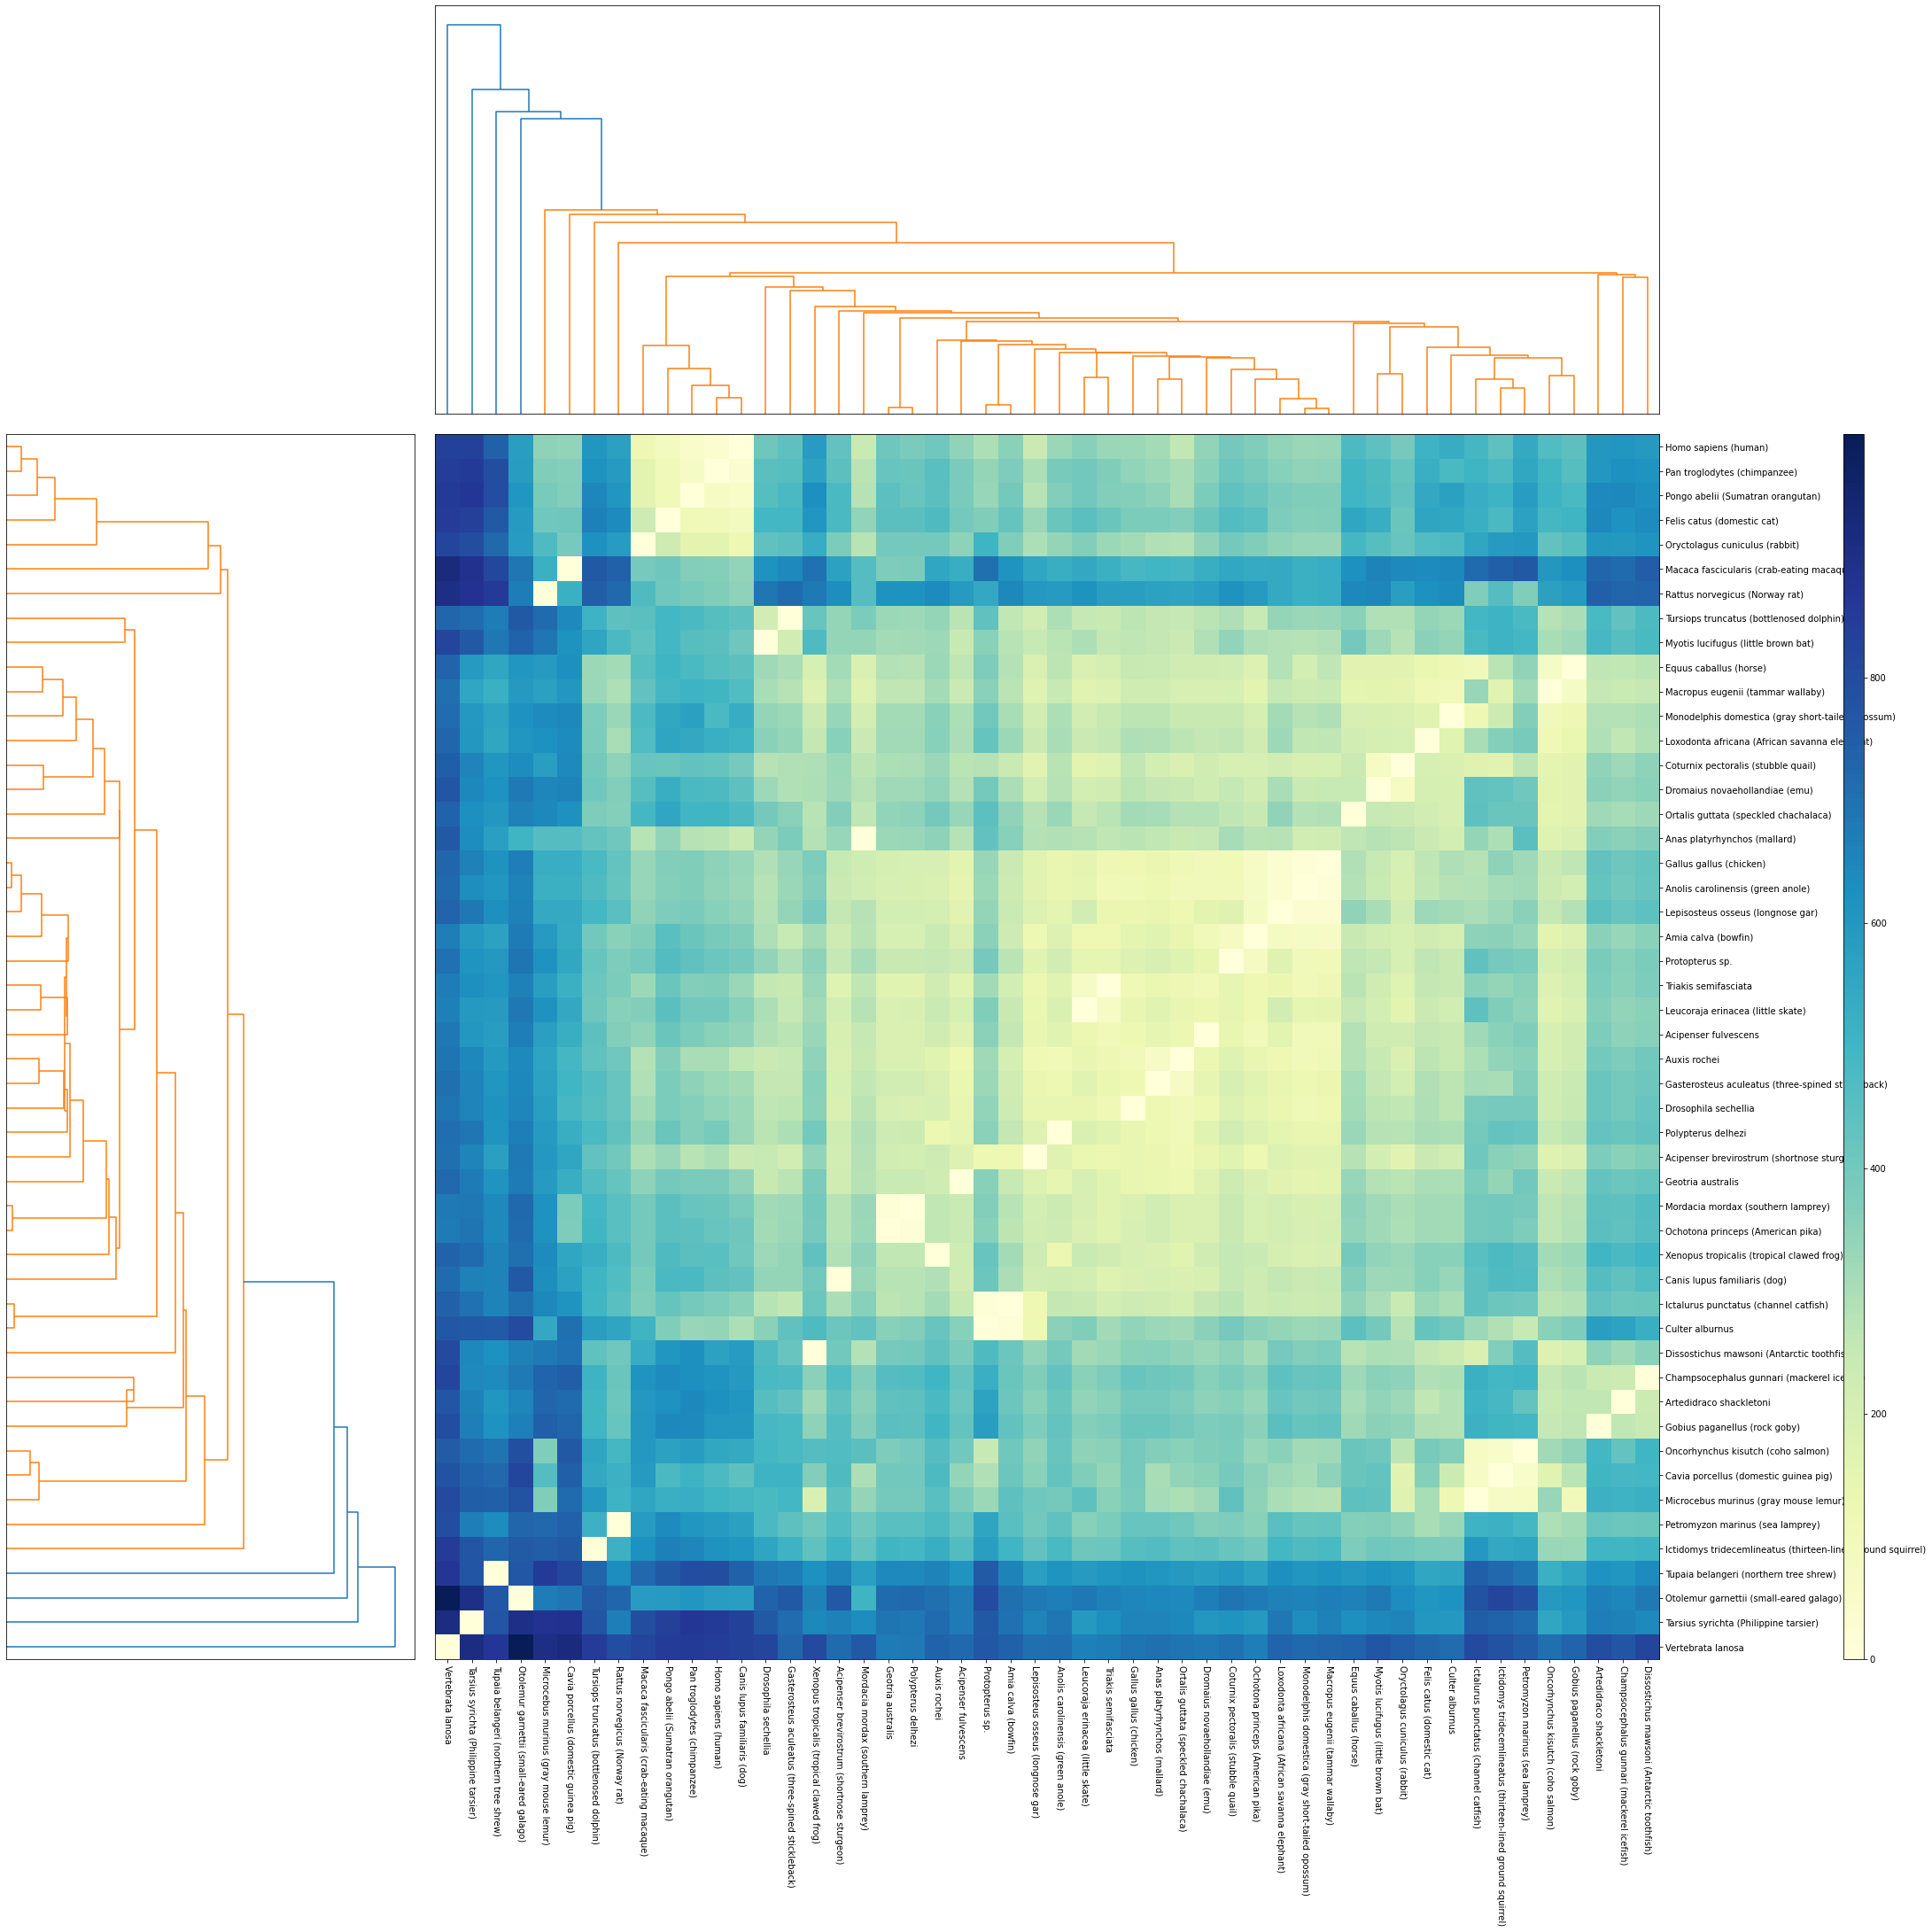

In [ ]:
import matplotlib
%matplotlib inline
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 16]
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(32,32))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
print (distance_matrix.shape)

# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(distance_matrix) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

#distArray = distance_matrix
Y = sch.linkage(distArray, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')#, truncate_mode = 'level', p = 50)
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(distArray, method='single')
Z2 = sch.dendrogram(Y)#, truncate_mode = 'level', p = 50)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
print (idx1)
idx2 = Z2['leaves']
distance_matrix_reordered = distance_matrix[idx1,:]
distance_matrix_reordered = distance_matrix_reordered[:,idx2]
im = axmatrix.matshow(distance_matrix_reordered, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
# axmatrix.set_xticks([])
# axmatrix.set_yticks([])

#Annotate each row/col with the name of the sequence
textsize = 10

axmatrix.set_xticks(range(len(shortnames)))
axmatrix.set_xticklabels([shortnames[i] for i in idx1], minor=False, size =textsize)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=textsize)

axmatrix.set_yticks(range(len(shortnames)))
axmatrix.set_yticklabels([shortnames[i] for i in idx2], minor=False, size = textsize)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

# Plot colorbar.
axcolor = fig.add_axes([0.99,0.1,0.01,0.6])
plt.colorbar(im, cax=axcolor)
fig.show()
#fig.savefig('Dendrogram_%s.png'%('_'.join(sys.argv[2:])), dpi = 300)

Additional tasks

# Conserved regions in humans


*   Select all 154 human 18S sequences
*   Find the one that is the most similar to all the others
*   Align all sequences to that sequence
*   Walk along all alignments, and count the fraction of substition/indels 
*   Identify the most conserved regions
*   Which regions are most likely to be loops or stems in the 18S ribosomal subunit


1- To find the one most similar to all others, we do the NW alignment on each of the 154 on the remaining as before and we find 
the one with maximum score

2- Then we align the sequences to that one and store the results in a list 

3- From what I understand, we count the number of insertions and deletions and substituions in each alignment


4- To identify the most conserved regions, while aligning the sequences to the root sequence if it is a match, we put the index in a 
hashmap and we increment it in each of the 154 sequences if existing.

5- Then we sort the hashmap according to the values to get the indices with highest matching rate and these are the most conserved.

6- We then define a window of 5 and from each index, we put it in a region if the score doesn't change by more than 5

7- To find the loops, we reverse complement the 18s and perform local alignment.

8- In the local alignment matrix, we should see stripes that go diagonally these correspond to the loops.

punish mismatches becasue the matches are short

9- Conntecting these stries adds the stems (Ask here about how to connect them)

# Faster alignment

The parasail library is an order of magnitude faster at performing alignments, and it also has semi-global alignment options, where insertions and deletions from the starts and ends of pairs of sequences are not punished. 

It is highly recommended that you try your hand at using Parasail instead of nwalign3.

Documentation available here: https://github.com/jeffdaily/parasail-python


In [ ]:
!pip install parasail

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.6 MB 19.5 MB/s 


In [ ]:
import parasail

matrixfile = open("matrix.txt",'w')
matrixfile.write("  A C G U *\nA 2 -1 -1 -1 -2\nC -1 2 -1 -1 -2\nG -1 -1 2 -1 -2\nU -1 -1 -1 2 -2\n* -2 -2 -2 -2 -2\n")
matrixfile.close()

scoringm = parasail.Matrix("matrix.txt")

max_score_per_base = 2
gap_open = 3
gap_extend = 1

seqA = "ACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGU"*816

seqB = "ACGUACGUACGUACGUACGUACGUACGUACGUACGAAAAAAAAAAAAAAAAAAAAAAAAUAAACGUACGUAC"*416

import numpy as np
import time

maxscore = max_score_per_base*min(len(seqA),len(seqB))

#Then calling parasail for the score:
t0 = time.time()
result =  parasail.sg_stats_striped_32(seqA,seqB, gap_open, gap_extend,scoringm)
print(time.time()-t0)
distance = maxscore - result.score

print (result.score,distance)

7.385383605957031
32868 27036


Define a substitution matrix according to: https://github.com/jeffdaily/parasail-python#substitution-matrices

In [ ]:
matrixfile = open("matrix.txt",'w')
matrixfile.write("  A C G U *\nA 2 -1 -1 -1 -2\nC -1 2 -1 -1 -2\nG -1 -1 2 -1 -2\nU -1 -1 -1 2 -2\n* -2 -2 -2 -2 -2\n")
matrixfile.close()

scoringm = parasail.Matrix("matrix.txt")

max_score_per_base = 2
gap_open = 3
gap_extend = 1

seqA = "ACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGUACGU"*816

seqB = "ACGUACGUACGUACGUACGUACGUACGUACGUACGAAAAAAAAAAAAAAAAAAAAAAAAUAAACGUACGUAC"*416


In [ ]:
from tqdm import tqdm
import seaborn as sns


In [ ]:
import numpy as np
import time

maxscore = max_score_per_base*min(len(seqA),len(seqB))

#Then calling parasail for the score:
t0 = time.time()
result =  parasail.sg_stats_striped_32(seqA,seqB, gap_open, gap_extend,scoringm)
print(time.time()-t0)
distance = maxscore - result.score

print (result.score,distance)


7.241260051727295
32868 27036


# Aligning all sequences to find the best match "The reference"

In [ ]:
humansequences = []
for name in allsequences.keys():
    if ';' in name:
        speciesname = name.rpartition(';')[2]
        if "Homo" in speciesname:
            humansequences.append(allsequences[name])

In [ ]:
matrixfile = open("matrix.txt",'w')
matrixfile.write("  A C G U *\nA 2 -1 -1 -1 -2\nC -1 2 -1 -1 -2\nG -1 -1 2 -1 -2\nU -1 -1 -1 2 -2\n* -2 -2 -2 -2 -2\n")
matrixfile.close()
scoringm = parasail.Matrix("matrix.txt")
max_score_per_base = 2
gap_open = 3
gap_extend = 1



seqA, seqB = humansequences[0],humansequences[1]
maxscore = max_score_per_base*min(len(seqA),len(seqB))

t0 = time.time()
result =  parasail.sg_stats_striped_32(seqA,seqB, gap_open, gap_extend,scoringm)
print(time.time()-t0)
distance = maxscore - result.score

print (result.score,distance)

0.023552894592285156
3112 564


In [ ]:
maxdistance = 0
maxsequence = 0
humansequences
for i in tqdm(range(len(humansequences))):
    distance =0
    for j in range (len(humansequences)):
        seqA, seqB = humansequences[i],humansequences[j]
        maxscore = max_score_per_base*min(len(seqA),len(seqB))
        result =  parasail.sg_stats_striped_32(seqA,seqB, gap_open, gap_extend,scoringm)            
        distance += (maxscore - result.score)
    if distance > maxdistance:
        maxsequence = i
        maxdistance = distance
        

100%|██████████| 154/154 [05:36<00:00,  2.19s/it]


In [ ]:
bestalign = humansequences[maxsequence]
alignmentlist = []
for i in tqdm(range(len(humansequences))):
    seqA, seqB = bestalign,humansequences[i]
    maxscore = max_score_per_base*min(len(seqA),len(seqB))
    result =  parasail.sg_stats_striped_32(seqA,seqB, gap_open, gap_extend,scoringm)
    alignmentlist.append(result)

100%|██████████| 154/154 [00:02<00:00, 68.55it/s]


1- To find the one most similar to all others, we do the NW alignment on each of the 154 on the remaining as before and we find 
the one with maximum score

2- Then we align the sequences to that one and store the results in a list 

3- From what I understand, we count the number of insertions and deletions and substituions in each alignment


4- To identify the most conserved regions, while aligning the sequences to the root sequence if it is a match, we put the index in a 
hashmap and we increment it in each of the 154 sequences if existing.

5- Then we sort the hashmap according to the values to get the indices with highest matching rate and these are the most conserved.

6- We then define a window of 5 and from each index, we put it in a region if the score doesn't change by more than 5

7- To find the loops, we reverse complement the 18s and perform local alignment.

8- In the local alignment matrix, we should see stripes that go diagonally these correspond to the loops.

punish mismatches becasue the matches are short

9- Conntecting these stries adds the stems (Ask here about how to connect them)

### Exploring different ways of alignment

In [ ]:
score_size = 1 # 0, use 8-bit align; 1, use 16-bit; 2, try both
result = parasail.ssw(humansequences[1], humansequences[2], 10, 1, parasail.blosum62)
print(result.score1)
print(result.ref_begin1)
print(result.ref_end1)
print(result.read_begin1)
print(result.read_end1)


7596
1
1772
42
1854


In [ ]:
result = parasail.nw_trace_scan("aattg", "aaxtfggg", 10, 1, parasail.blosum62)
result.traceback.comp
result.traceback.pointer.contents.ref
cigar = result.cigar
# cigars have seq, len, beg_query, and beg_ref properties
# the seq property is encoded
print(cigar.seq)
# use decode attribute to return a decoded cigar string
print(cigar.decode)

[39 24 23 50 23]
b'2=1X1=3D1='


## Algining everything to the reference

In [ ]:
bestalign = humansequences[maxsequence]
alignmentlist = []
for i in tqdm(range(len(humansequences))):
    seqA, seqB = bestalign,humansequences[i]
    result = parasail.nw_trace_scan(seqA, seqB, 10, 1, parasail.blosum62)
    alignmentlist.append(result.traceback.comp)

100%|██████████| 154/154 [00:06<00:00, 22.79it/s]


## Comparing the number of indels to matches to subs 

(array([224340.,      0.,      0.,      0.,      0.,  36399.,      0.,
             0.,      0.,  26851.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

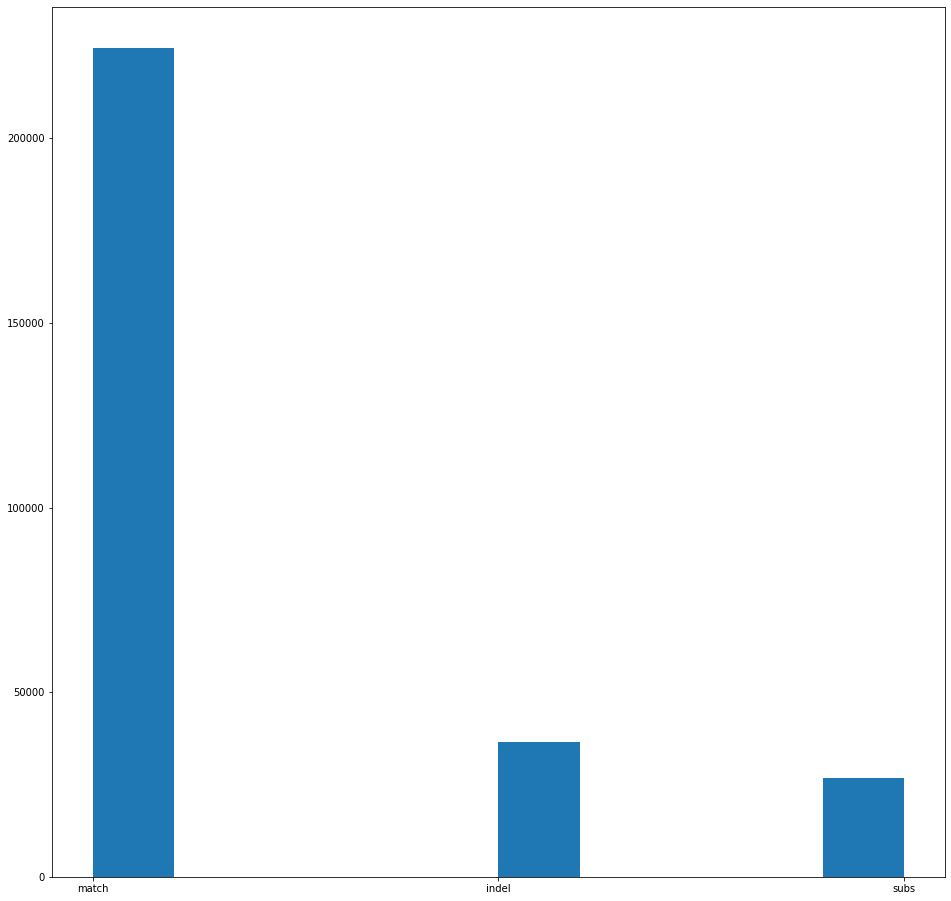

In [ ]:
regions = {}
matches = 0
indels = 0
subs = 0

for al in alignmentlist:
    for i in range(len(al)):
        if al[i] == "|":
            regions[i] = regions.get(i,0) +1
            matches +=1
        elif al[i] ==" ":
            indels +=1
        elif al[i] ==".":
            subs+=1
matrix = ['match']*matches
matrix.extend(['indel']*indels)
matrix.extend(['subs']*subs)
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.hist(matrix)

## Finding the conserved regions

In [ ]:
sort_by_value = dict(sorted(regions.items(), key=lambda item: item[1],reverse=True))

In [ ]:
import numpy as np

In [ ]:
# Let's consider the values of 70th percentile and above to be a conserved region -> a stem
values = np.array(list(sort_by_value.values()))
np.percentile(values,70)

136.0

In [ ]:
sort_by_value

{1015: 154,
 625: 151,
 913: 151,
 960: 151,
 989: 151,
 990: 151,
 991: 151,
 994: 151,
 995: 151,
 1004: 151,
 1009: 151,
 1017: 151,
 988: 150,
 996: 150,
 1007: 150,
 1245: 150,
 554: 149,
 568: 149,
 587: 149,
 592: 149,
 606: 149,
 607: 149,
 905: 149,
 979: 149,
 992: 149,
 993: 149,
 1010: 149,
 1011: 149,
 1012: 149,
 1170: 149,
 1209: 149,
 1244: 149,
 1014: 149,
 456: 148,
 552: 148,
 555: 148,
 560: 148,
 570: 148,
 585: 148,
 589: 148,
 626: 148,
 645: 148,
 676: 148,
 766: 148,
 906: 148,
 959: 148,
 1008: 148,
 1016: 148,
 1237: 148,
 1239: 148,
 467: 147,
 550: 147,
 553: 147,
 556: 147,
 565: 147,
 571: 147,
 576: 147,
 580: 147,
 591: 147,
 597: 147,
 598: 147,
 599: 147,
 601: 147,
 614: 147,
 637: 147,
 909: 147,
 958: 147,
 961: 147,
 999: 147,
 1001: 147,
 1003: 147,
 1006: 147,
 1138: 147,
 1169: 147,
 1180: 147,
 1211: 147,
 1242: 147,
 1243: 147,
 1248: 147,
 566: 147,
 558: 146,
 562: 146,
 564: 146,
 567: 146,
 569: 146,
 579: 146,
 581: 146,
 590: 146,
 593:

In [ ]:
regions = []
for i in range (len(sort_by_value)):
    if sort_by_value.get(i,0) >= 130:
        regions.append("-")
    else:
        regions.append("o")

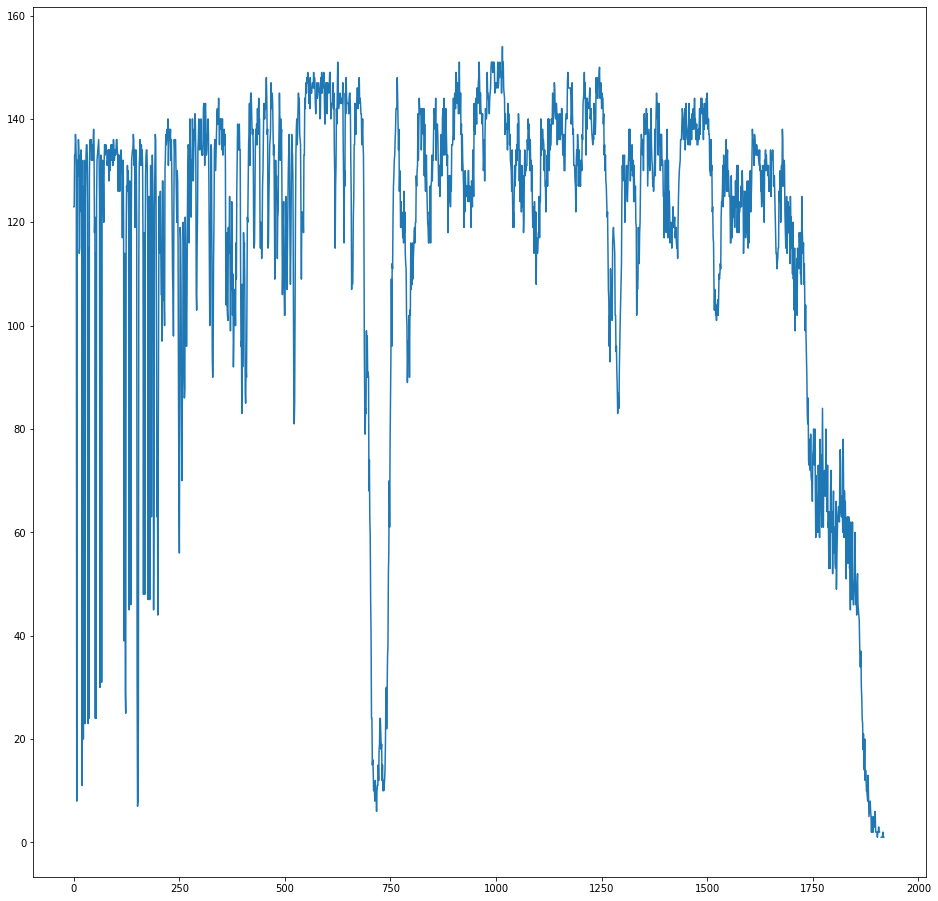

In [ ]:
plt.plot([i for i in range (len(sort_by_value))], [sort_by_value.get(i)for i in range (len(sort_by_value))] )

In [ ]:
sort_by_value[0]

123

## Ratio of stems to loops

(array([952.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

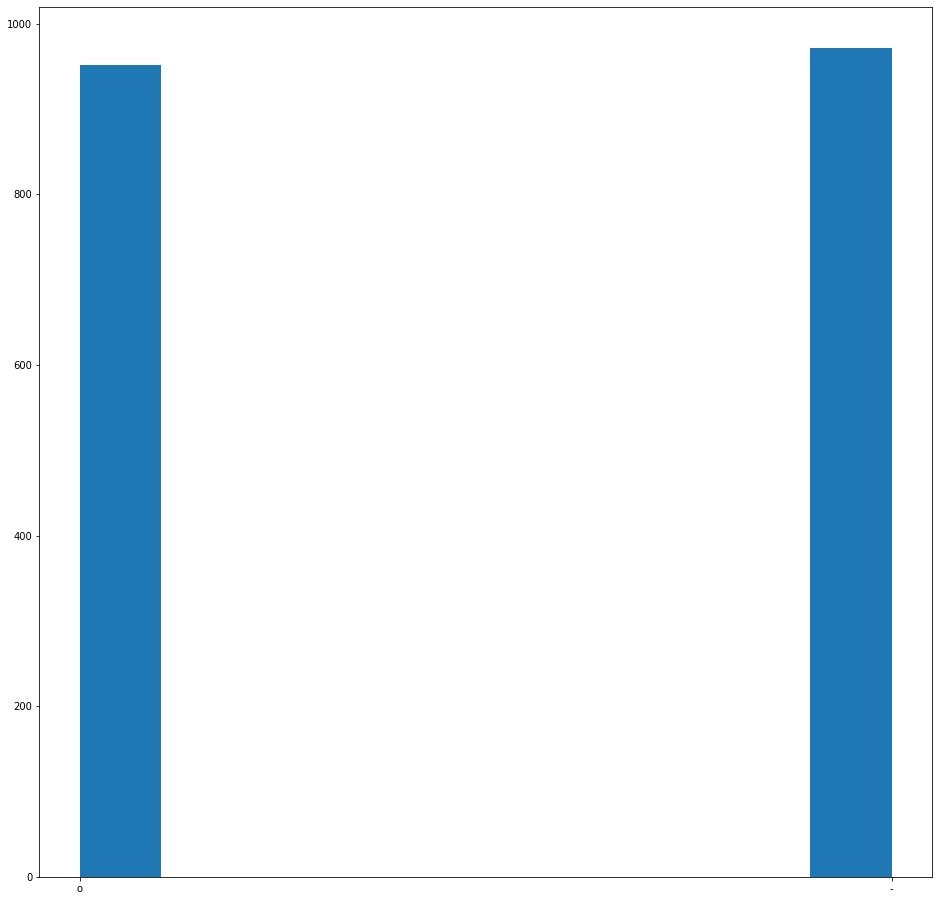

In [ ]:
plt.hist(regions)

In [ ]:
fil_regions = regions
def getstemlength(index):
    i=0
    while fil_regions[index] =="-":
        i+=1
        index+=1
    return i

for i in range (len(fil_regions)):
    if fil_regions[i] =='-': continue
    stemlength = getstemlength(i)
    if stemlength <5:
        for j in range(stemlength):
            fil_regions[i+j] = '-'

(array([952.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

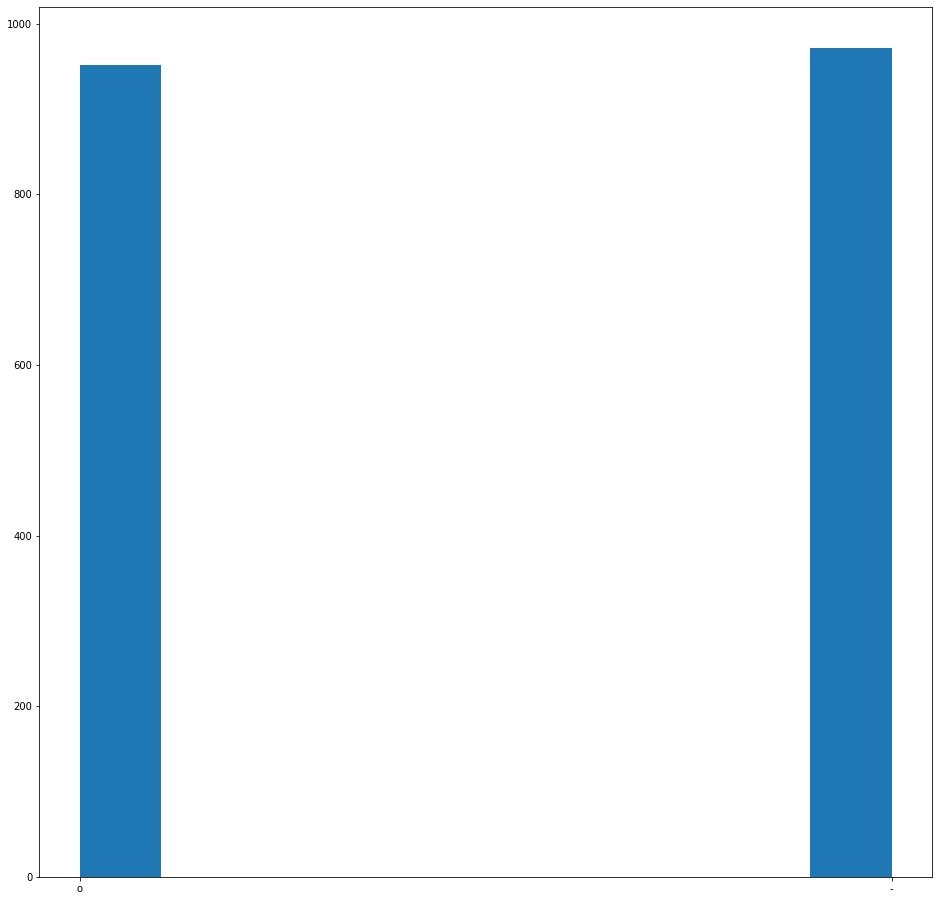

In [ ]:
plt.hist(fil_regions)

# Finding the stems and loops using alignment 

In [ ]:
ref = bestalign
rev = list(ref[::-1])
for i in range (len(rev)):
    if rev[i] == "A":
        rev[i] = "U"
    elif rev[i] == "U":
        rev[i] = "A"
    elif rev[i] == "C":
        rev[i] = "G"
    elif rev[i] == "G":
        rev[i] = "C"
rev= "".join(rev)

In [ ]:
def match_score1(a,b):
    if a == b:
        return 1
#     elif (a == "A" and b =="C" ) or (a =="C" and b == "A"):
#         return -3
    else:
        return -10
gap_score = -10

def SmithWaterman(query,subject,scorefunc):
    swmatrix = np.zeros ((len(query)+1,len(subject)+1)) #in Smith-Waterman, we only initialize to 0
  
    for q in range(1,len(query)+1):
        for s in range(1,len(subject)+1):
      #the value of each cell is MAX[NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score, 0]
      #Note that we cannot go below 0!
            swmatrix[q,s] = max(swmatrix[q-1,s-1]+ scorefunc(query[q-1],subject[s-1]), swmatrix[q-1,s] -1 , swmatrix[q,s-1] + gap_score,0 ) #TODO
      
    sequence = []
    sequence2 = []
    current = 1
    row,col= len(query)  , len(subject)
    while current > 0 or (row > 0 and col > 0):
        current = swmatrix[row,col]
        up = swmatrix[row-1,col]
        diag = swmatrix[row-1,col-1]
        left = swmatrix[row,col-1]    
        if diag + scorefunc(query[row-1],subject[col-1]) > left + gap_score and diag + scorefunc(query[row-1],subject[col-1]) > up +gap_score :
            sequence.append(subject[col-1])
            sequence2.append(query[row-1])
            col-=1
            row-=1

        elif up + gap_score > left + gap_score and up +gap_score >= diag + scorefunc(query[row-1],subject[col-1]):

            sequence.append("-")
            sequence2.append(query[row-1])
            row -=1

        else:
            sequence.append(subject[col-1])
            sequence2.append("-")
            col-=1
    

    alignment_score = swmatrix[len(query)-1, len(subject) -1]
  #TODO: trace back from the highest scoring cell while score is greater than 0!
    fig, ax = plt.subplots(figsize=(25,10)) 
    sns.heatmap(swmatrix)
    plt.show()
    return alignment_score 

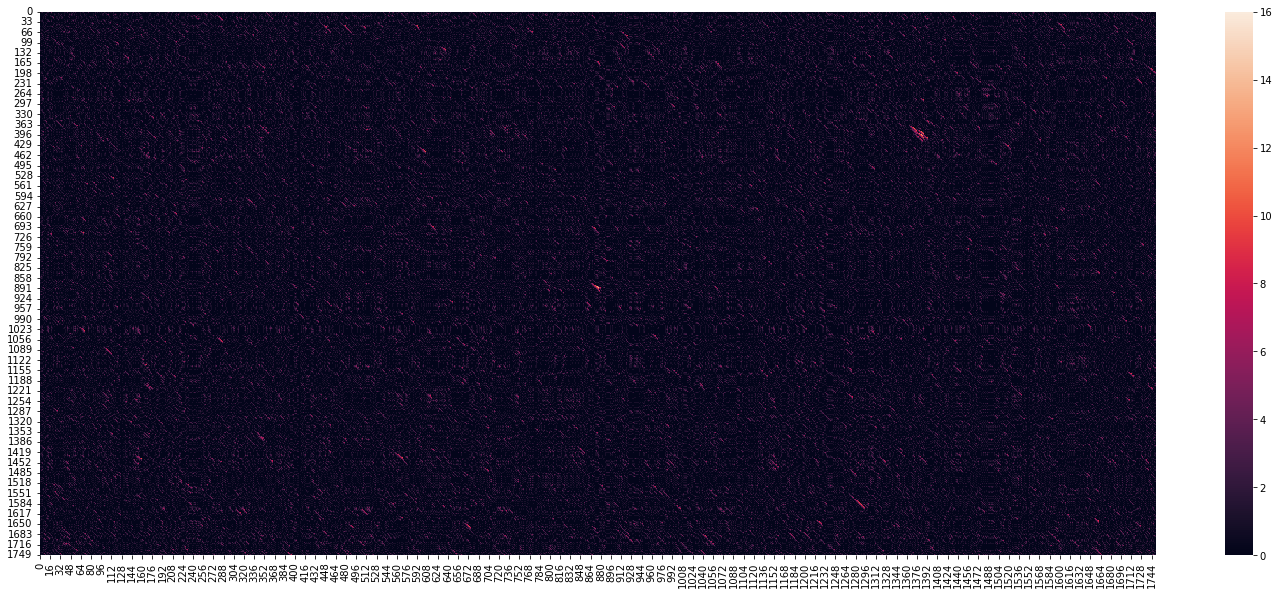

In [ ]:
score = SmithWaterman(ref,rev,match_score1)

In [ ]:
gap_open=10
gap_extend=2

In [ ]:
rev

'CGGUGAUCAAUGUGUCCUGCAAUUCAAAUUAUCAUAGCUAGCUGCAUUCUUUGAUGCACGAGCUGAGUGAUCCACUGCUAAGAGUCCUAUGAGGUCGAUUUGGGUUCUGAGGGCCUCAUUAAACCAUCSACUUGGUAUUAGCGACUGGCUGUGUGGUACAAAGGGCAGGGACUUAACGCAAGCUUAUGACCCACACUUACUGGGAAUUGCUCAUUCAUGGGGAAUAAUUGCAAUCCCCCAUCCCCAUCACAAAUGAGGUUCAAUGGGUUACCCGCACCUGCCAGCAUAGGGUAGGCACACGCUGAGCCAGUGUAACACACAUGCAGCCCCGGACAUCUAAGGGCAUCACAGACCUGUUACUGCUCAAUCUCGGGUGGCUGAAUGCCACUUGUCCCUCUAAGAAGUUUSAGGACGCUGACCACUCUGGGGUCGCAUAAUGAGUUAGCAUGCCAGAGUCUCGUUUAUUAUCGGAAUUAGCCAGACAAAUCGCUCCACCAAGAACAGCCAUGCACCACCACUCACGGAAUCGAGAAAGAGCUGUCAAUCCUGUCCCUGUCCGGGUGAGGUUUCCCGUGUUGAGUCAAAUUAAGCCACAGGCUCCACUCCUGGUGGUGCCCUUCUGUUAAUUCCUUUGUUUCAGCUUUGCAACCAUACUCCCACCGGAACCCAAAGACUUUGGUUUCCCGGAAGCUGCCUGGCAGGUCAUGGGAAUAAUGCCACCACAUCACCAGUCAGCAUCGUUUAUGGUGGGAAUUAUGACGGUAUCUGAUCAUCUUSAAACCUCCGACUUUCAUUCUUGAUUAAUGAAAACAUUCUUGGCAAAUGCUUUCGCUCUGGUCCGUCUUGUGCCGGUCCAAGAAUUUCACCUCUAGAGGUGCAAUAUGAAAGCCCCCCGGCCGUCCCUCUUAAUCAUGGCCUCAGUUCAAAAACCCACAAAAUAGAACCACGGUCCUCUUCCAUUAUUCCUAGCUUCAGAAUCCAGGUGGCUCGGGCCUGCUU

In [ ]:
result =  parasail.sw_trace(ref,rev, gap_open, gap_extend,scoringm)

In [ ]:
cigar = result.cigar
print(cigar.decode)

b'2=1X2=3X3=2X2=3X2=3X2=1D1X1=1X2=2X2=1X1=4X5=1I1=2X1=1X1=4X3=2X1=1X1=5X1=2X2=2X1=1X9=1X2=3X1=1D1=1X1=1X1=2X1=3X1=2X1=2X1=2X1=1X1=2X1=1X1=1X1=3X1=1X1=1D2X6=2X1=1X2=1D3X1=4X2=2X2=1X2=1X2=1X1=1X1=4X1=1X4=2X3=1X2=3X4=1X1=3X1=4X1=2X1=1X1=2X1=2X2=5X1=6X2=2X5=1X1=1X1=3X1=4X1=1X1=2X3=7X1=1X1=1X1=1X2=2X1=2X2=4X1=3I1X1=1X1=1X1=2X1=1X1=2X2=2X2=3X1=1X2=3X2=2X1=5I2X4=1X1=1X3=5X1=1X1=1X2=3X1=1X3=4X1=3X1=1X1=1X1=2X1=2X1=2X3=1X1=2X1=1X1=2X1=3X1=9X1=2X3=2X3=1X2=1X2=1X1=1I1=1X2=5X2=4X4=5X3=1X1=1D1=2X1=5X3=1X1=3X1=1X1=1X1=1X2=7X1=1X1=1X1=1X1=1X2=3X1=1D1=1X1=1X2=3X2=2X1=3X1=2X5=4X1=2X1=1X1=2X3=2X1=1X1=2X1=2I1X1=2X2=2X1=1X1=3X2=3I1=4X2=3X6=1I2X2=6X1=1X6=3I2=4X1=3X1=2X1=3X2=3X1=1X2=1X1=6X2=2X1=4X1=1X2=1X1=1X1=1X1=3X3=1X1=5X2=1X2=2X2=3X1=3X1=1X1=4D1X1=4X1=2X2=1X2=2X1=3X2=2D1X1=2X2=2X3=2X1=4X1=3X2=2X1=1X2=6X1=1X2=1X2=2I2=1X1=1X1=1X1=2X2=1I1X2=1X5=1X2=5X1=3X1=4X1=2X3=5X1=2X1=4X2=3X3=1I1X1=3X4=4X1=2X1=4X1=1X1=1X1=3X4=3X1=1X1=1X1=4X1=2X1=4X4=3X1=1D1X3=3X2=4X1=2X1=5X3=2X1=4X1=3X1=5X2=1X5=1X1=1D1=1X2=2X1=1X1=1X1=

## Idea: Move through the array called regions. Search for starting sequences, if the sequence is shorted that 5, assign it to a loop. Otherwise, a stem becasue a stem has to be a bit long

In [ ]:
x = [chr(y) for y in cigar.decode]

In [ ]:
myformat =[]
i = 1
while i < len(x):
    if x[i] == "=":
        myformat.extend(['o'] * int(x[i-1]))
    else:
        myformat.extend(['-'] * int(x[i-1]))
    i+=2

In [ ]:
fil_regions_al = myformat[::]
def getstemlength_al(index):
    i=0
    while fil_regions_al[index] =="-":
        i+=1
        index+=1
    return i

for i in range (len(fil_regions_al)):
    if fil_regions_al[i] =='-': continue
    stemlength = getstemlength_al(i)
    if stemlength <5:
        for j in range(stemlength):
            fil_regions_al[i+j] = '-'

(array([ 730.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1006.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

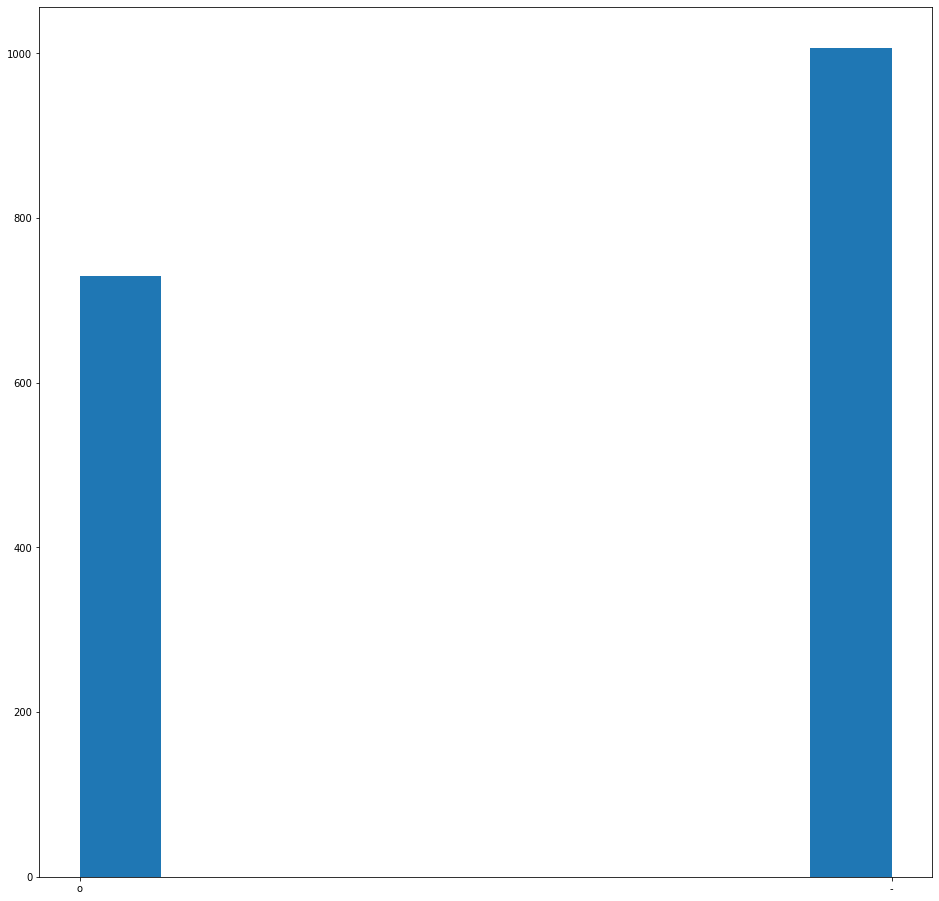

In [ ]:
plt.hist(myformat)


(array([ 730.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1006.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

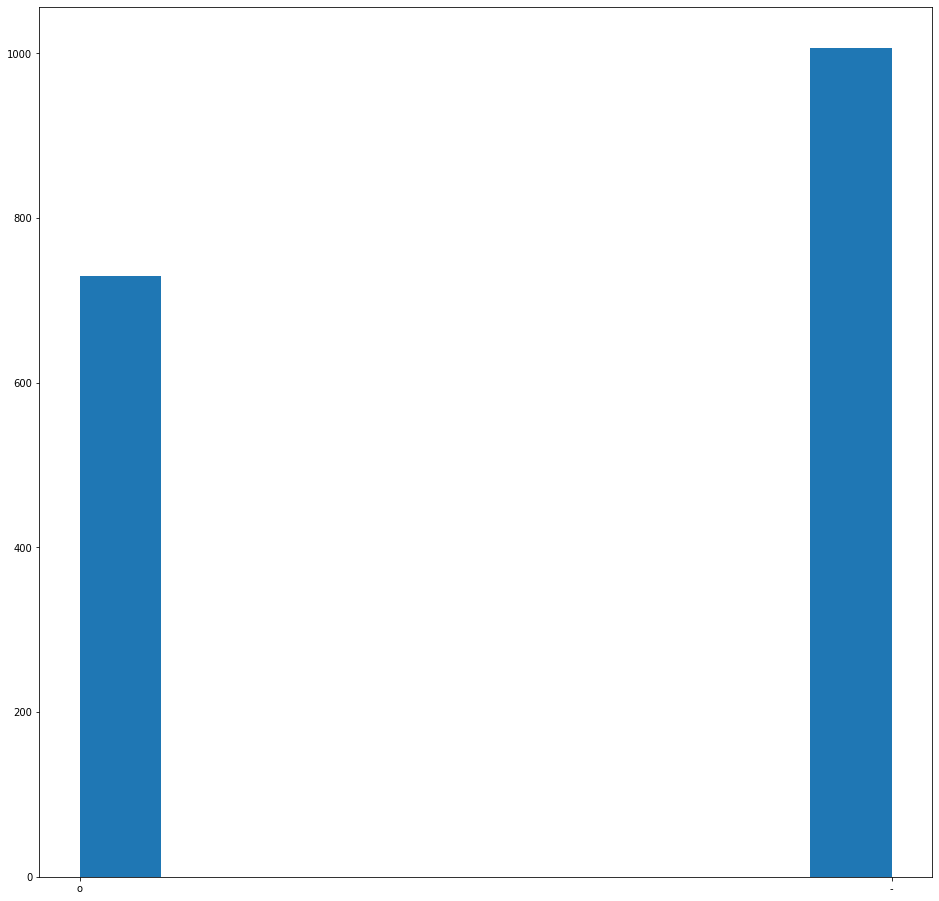

In [ ]:
plt.hist(fil_regions_al)

(array([952.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

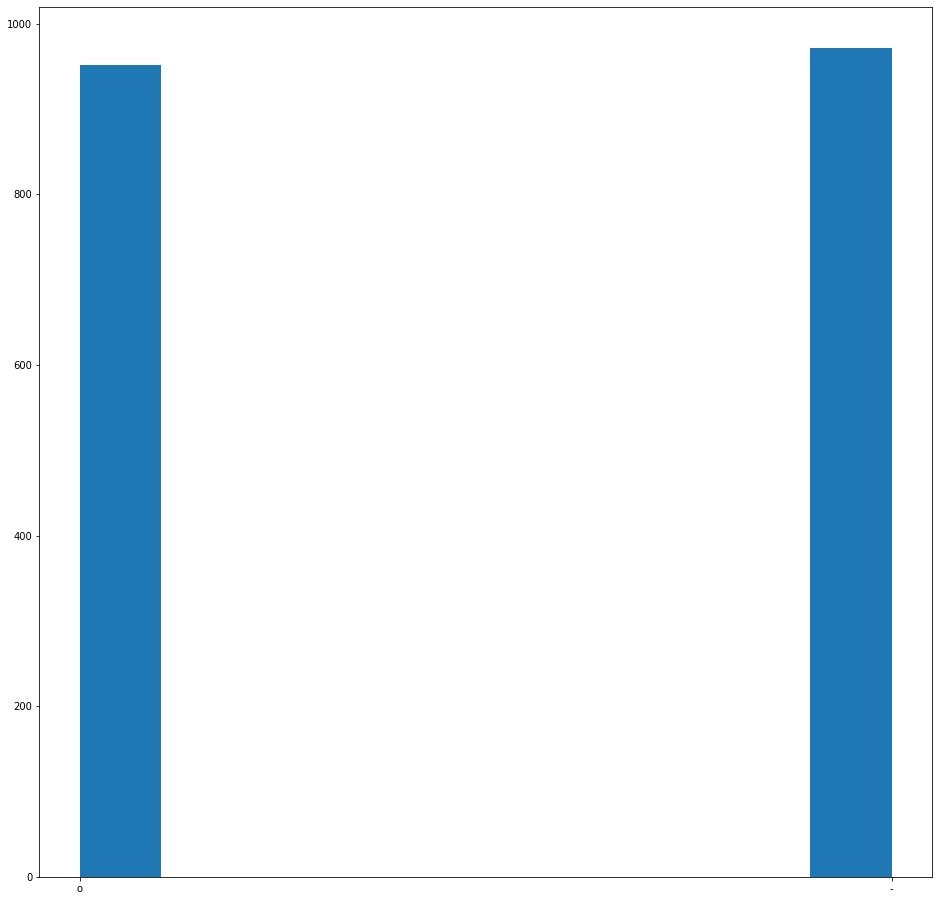

In [ ]:
plt.hist(fil_regions)

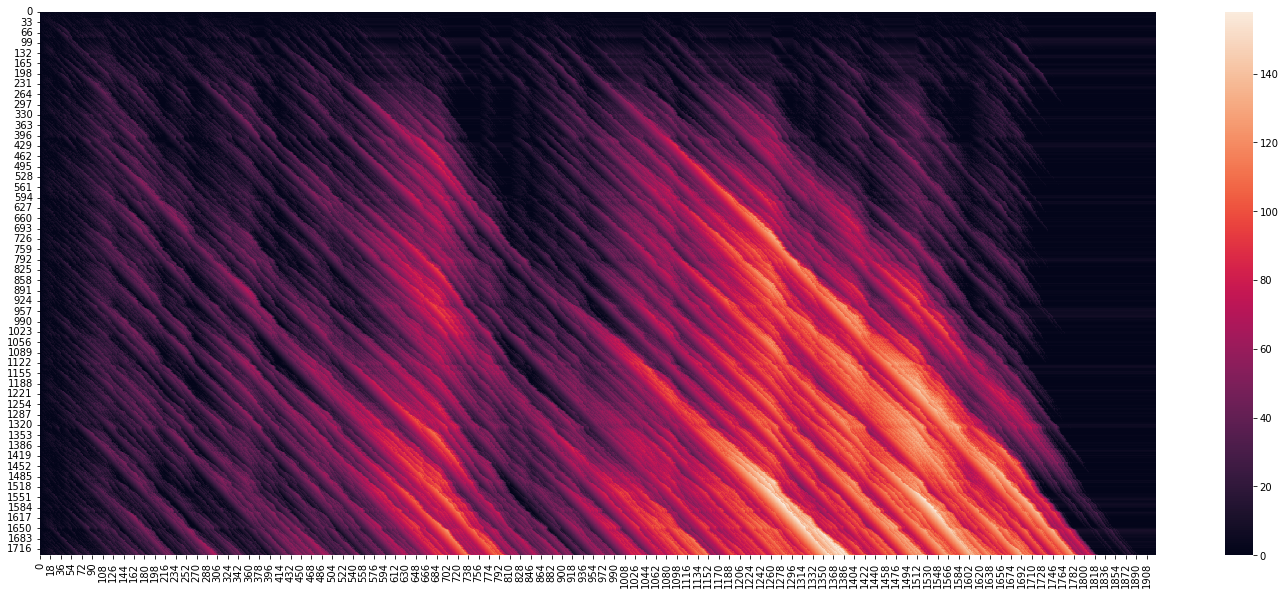

2.0

In [ ]:
SmithWaterman("".join(fil_regions_al),"".join(fil_regions),match_score1)

In [ ]:
def NeedlemanWunsch(query, subject, scorefunc):
  t0 = time.time()
  nwmatrix = np.zeros ((len(query)+1,len(subject)+1))
  # 
  for i in range(len(nwmatrix[0])):
    nwmatrix[0,i]= -i
  for i in range (len(nwmatrix)):
    nwmatrix[i,0]= -i

  # TODO: we need to initialize the first row and column of the matrix to increasing gap penalties
  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX(NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score)
      nwmatrix[q,s] = max(nwmatrix[q-1,s-1] + scorefunc(query[q-1],subject[s-1]), nwmatrix[q-1,s] + gap_score, nwmatrix[q,s-1] + gap_score) 
      

  traceback_position = [len(query), len(subject) ]
  sequence = []
  sequence2 = []
  row,col= len(query)  , len(subject)
  while row > 0 and col > 0:
    current = nwmatrix[row,col]
    up = nwmatrix[row-1,col]
    diag = nwmatrix[row-1,col-1]
    left = nwmatrix[row,col-1]    
    if diag + scorefunc(query[row-1],subject[col-1]) > left + gap_score and diag + scorefunc(query[row-1],subject[col-1]) > up +gap_score :
      sequence.append(subject[col-1])
      sequence2.append(query[row-1])
      col-=1
      row-=1

    elif up + gap_score > left + gap_score and up +gap_score >= diag + scorefunc(query[row-1],subject[col-1]):

      sequence.append("_")
      sequence2.append(query[row-1])
      row -=1

    else:
      sequence.append(subject[col-1])
      sequence2.append("_")
      col-=1
    
   
  sequence.reverse()
  sequence2.reverse()
  print(sequence)
  print(sequence2)


  alignment_score = nwmatrix[len(query)-1, len(subject) -1]

  print ('Alignment performed in %.3f seconds'%(time.time()-t0))
  
  sns.heatmap(nwmatrix)
  plt.show()
  return alignment_score 

['o', 'o', '-', '-', '_', '-', '-', '-', 'o', '_', '_', '-', '-', 'o', '_', '-', '-', '_', 'o', 'o', '-', '-', '-', 'o', '_', '-', 'o', 'o', 'o', 'o', 'o', '-', '_', 'o', 'o', '_', 'o', '-', '-', '-', '-', 'o', 'o', 'o', 'o', 'o', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'o', 'o', 'o', 'o', '_', 'o', '_', 'o', '-', '-', '-', '-', '-', '_', '-', '_', 'o', 'o', '_', '_', 'o', '-', 'o', 'o', 'o', '-', '-', 'o', 'o', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '_', '-', 'o', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '_', '-', '-', 'o', '-', '-', '-', 'o', 'o', '-', '-', '-', 'o', '_', 'o', '-', '-', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '-', 'o', '-', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '-', '-', '-', '-', '_', '-', '-', '-', '-', 'o', '-', '-', '-', 'o', 'o', 'o', 'o', 'o', 'o', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '-', '-', '-', '-', 'o', 'o', 'o', 'o', 'o', 'o', 'o',

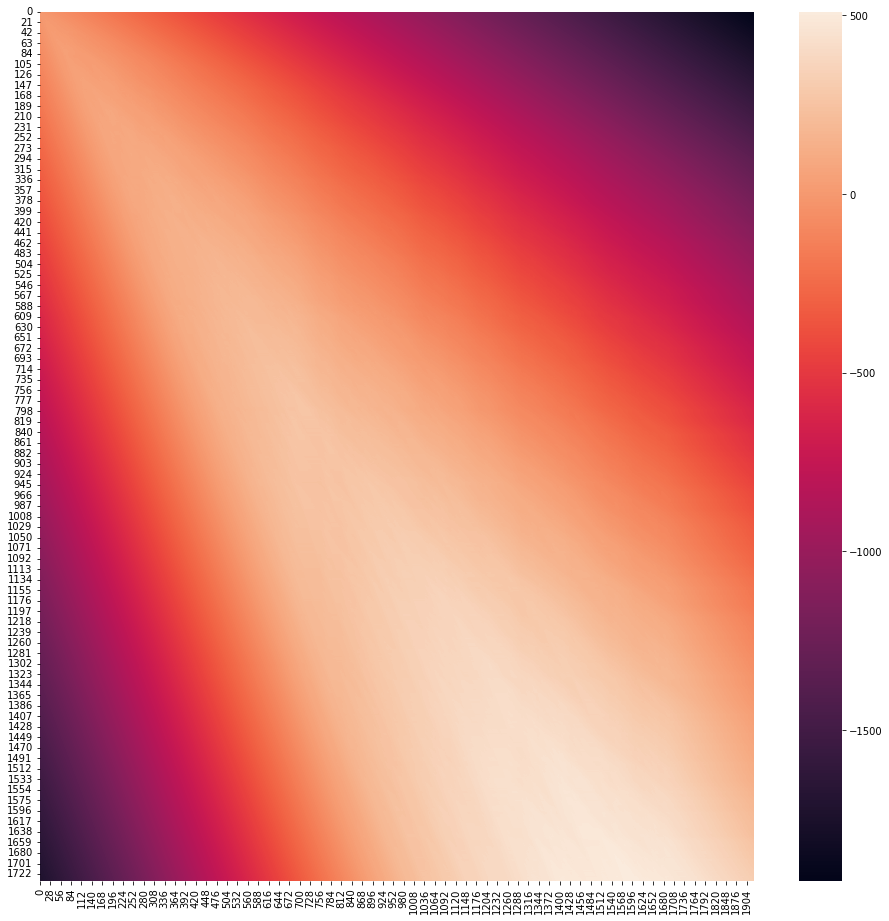

323.0

In [ ]:
NeedlemanWunsch("".join(fil_regions_al),"".join(fil_regions),match_score)

In [ ]:
def match_score(a,b):
  if a == b:
    return 1
  else:
    return -1

gap_score = -1